In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

### Problem 1
Từ dữ liệu về chiều cao, cân nặng trong file **Data_height_weight_of_female.xlsx** bạn hãy dùng Linear Regression để dự đoán cân nặng dựa vào chiều cao, và trực quan hóa

In [2]:
df = pd.read_excel('Data_height_weight_of_female.xlsx')

In [3]:
df.head(5)

,Chiều cao,Cân nặng
0,74.0cm,12.9kg
1,80.7cm,10.2kg
2,86.4cm,9.5kg
3,90.7cm,16.7kg
4,95.7cm,16.9kg


In [4]:
df['Chiều cao'] = df['Chiều cao'].apply(lambda x: float(x.replace('cm', '')))
df['Cân nặng'] = df['Cân nặng'].apply(lambda x: float(x.replace('kg', '')))

In [5]:
df.head()

,Chiều cao,Cân nặng
0,74.0,12.9
1,80.7,10.2
2,86.4,9.5
3,90.7,16.7
4,95.7,16.9


In [6]:
import random
df['Cân nặng'] = df['Cân nặng'].apply(lambda x: x + random.randint(-5, 5))

In [7]:
data = np.array([df['Chiều cao']]).T

In [8]:
label = np.array([df['Cân nặng']]).T

In [9]:
ones = np.ones((data.shape[0], 1), dtype = np.int8)

In [10]:
data = np.concatenate((data, ones), axis = 1)
data

array([[ 74. ,   1. ],
       [ 80.7,   1. ],
       [ 86.4,   1. ],
       [ 90.7,   1. ],
       [ 95.7,   1. ],
       [ 99. ,   1. ],
       [102.7,   1. ],
       [106.2,   1. ],
       [109.4,   1. ],
       [112.2,   1. ],
       [115.1,   1. ],
       [118. ,   1. ],
       [120.8,   1. ],
       [123.7,   1. ],
       [126.6,   1. ],
       [129.5,   1. ],
       [132.5,   1. ],
       [135.5,   1. ],
       [138.6,   1. ],
       [141.3,   1. ],
       [145. ,   1. ],
       [147.7,   1. ],
       [151.2,   1. ],
       [153.6,   1. ],
       [156.4,   1. ],
       [158. ,   1. ],
       [159.8,   1. ],
       [160.7,   1. ],
       [161.7,   1. ],
       [162.1,   1. ],
       [162.5,   1. ],
       [162.7,   1. ],
       [162.9,   1. ],
       [162.9,   1. ],
       [163.1,   1. ],
       [163.1,   1. ],
       [163.2,   1. ]])

In [11]:
x = np.linalg.inv(data.T.dot(data)).dot(data.T).dot(label)

#### Visualization

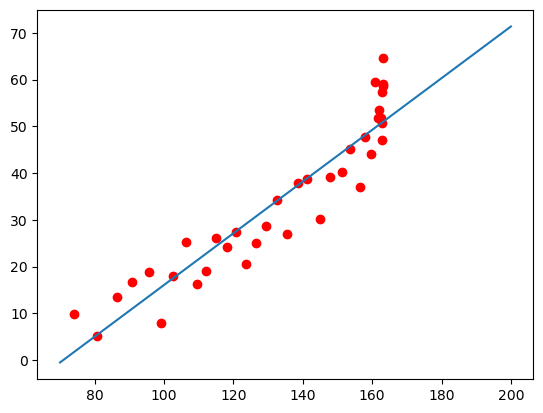

In [12]:
x0 = np.array([[70, 200]]).T
y0 = x0*x[0][0] + x[1][0]
plt.plot(df['Chiều cao'], df['Cân nặng'], 'ro')
plt.plot(x0, y0)
plt.show()

#### Predict

In [13]:
height = float(input("Nhập chiều cao bạn muốn dự đoán: "))
result = round(height*x[0][0] + x[1][0], 2)
print(f"Kết quả dự đoán là: {result}kg")

Nhập chiều cao bạn muốn dự đoán: 80
Kết quả dự đoán là: 5.02kg


### Problem 2
Từ dữ liệu file **Data_GPA_harvard.xlsx** bạn hãy dùng Linear Regression để dự đoán Điểm GPA của một sinh viên dựa vào chỉ số IQ và thời gian học trong một ngày của sinh viên đó

In [14]:
df = pd.read_excel('Data_GPA_harvard.xlsx')
df.head()

,IQ,hours per day,GPA
0,97,16,3.08
1,115,14,3.27
2,100,4,2.22
3,91,8,2.35
4,135,13,3.58


In [15]:
dataIQ = np.array([df['IQ']]).T
dataHour = np.array([df['hours per day']]).T
GPA = np.array([df['GPA']]).T

In [16]:
data = np.concatenate((dataIQ, dataHour), axis = 1)

In [17]:
LR = linear_model.LinearRegression()

In [18]:
LR.fit(data, GPA)

LinearRegression()

In [19]:
print(LR.coef_) # a
print(LR.intercept_) # b (độ dốc)

[[0.01911752 0.07644387]]
[0.00351354]


#### Predict

In [20]:
IQ, hour = map(float, input("Nhập IQ và hour của sinh viên bạn muốn dự đoán: ").split())
result = round(IQ*LR.coef_[0][0] + hour*LR.coef_[0][1] + LR.intercept_[0], 2)
print(f"Kết quả dự đoán là: {result} GPA")

Nhập IQ và hour của sinh viên bạn muốn dự đoán: 120 10
Kết quả dự đoán là: 3.06 GPA
